# Addition of 2 Numbers
## Background
This is a project to build dense networks for perform addtion of 2 numbers between 0-100, by purposely removing certain number(s) from the training data set. For example, 50, or any other number(s).

Certain other notes and considerations:
* This is a classfication problem, not regression.
* Dataset is not given, needs DIY.
* It's obvious that the output needs one-hot encoding, what about input?
* Use model.save & load_model to deal with save and restore

## Preparing the Datasets
### Using random from numpy module to create training datasets.

2.0.4
1.1.0
(500000,)
[40 15 72 ..., 12 28  3]


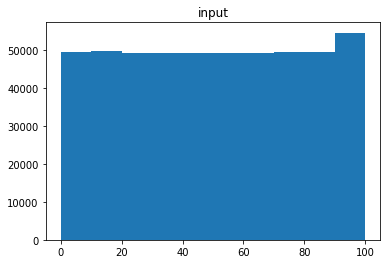

In [46]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

# Generate 20000 groups of numbers, value from 0 to 101(exclusive)
np.random.seed(2)
input = np.random.randint(0, 101, size=500000)

# Verify the dimension of the dataset
print(input.shape)
print(input)

# Plot the numbers by visually inspecting it's evenly distributed
plt.hist(input)
plt.title("input")

(494996,)
[40 15 72 ..., 15 12 28]
[40 15]


(array([  5280.,  15131.,  24304.,  34047.,  43800.,  44194.,  34414.,
         25109.,  15491.,   5728.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.]),
 <a list of 10 Patch objects>)

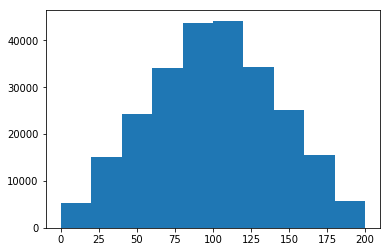

In [32]:
# Remove the numbers that we want the network to perform the prediction
remove_num = [50]
for i in remove_num:
    input = input[input != i]
    # Another way could be
    #iIndex = np.argwhere(input == i)
    #input = np.delete(input, iIndex)

# Remove the last number if the size of input is odd number
input_train = input if input.size%2==0 else input[:input.size-1]
print(input_train.shape)
print(input_train)

# Reshape to groups of 2 integers
input_train = input_train.reshape(int(input_train.size/2), 2)
print(input_train[0])

# Calculate the output and plot it, the result should be normally distributed
output_train = np.sum(input_train, axis=1)
plt.hist(output_train)

In [33]:
# One-hot encode the training output, there are 201 possible values of output
import keras
from keras.models import Model, Sequential
from keras.layers import *
n_classes = 201
print(output_train)

# Normalize the training input
x_train = input_train.astype('float32')
x_train = x_train / 100
y_train = keras.utils.to_categorical(output_train, n_classes)
print(output_train[0], '\n', input_train[0], '\n', x_train[0], '\n', y_train[0], '\n', y_train.shape)

[ 55  94 125 ..., 121  94  40]
55 
 [40 15] 
 [ 0.40000001  0.15000001] 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.] 
 (247498, 201)


### Create testing datasets
The way to create testing datasets will be slightly different from the training dataset. A two dimensional numpy array will be created first, then we only keep those groups contain the number we want to test against to.

(500000, 2)
(9951, 2)
(9950, 2)


(array([ 1052.,  1016.,  1010.,  1004.,   950.,   895.,  1037.,   897.,
          972.,  1117.]),
 array([  50.,   60.,   70.,   80.,   90.,  100.,  110.,  120.,  130.,
         140.,  150.]),
 <a list of 10 Patch objects>)

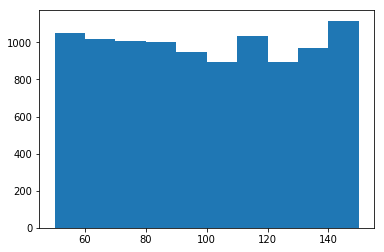

In [34]:
# Create 100000 pairs of integers
np.random.seed(2)
input_test = np.random.randint(0, 101, size=(500000,2))
print(input_test.shape)

# Create a list to store the valid testing cases, numpy array is immunable
temp_list = []
for i in input_test:
    for m in remove_num:
        if i[0] == m or i[1] == m:
            temp_list.append(i)
            # If found match from either element of the group, continue
            continue

# Conver to numpy array
input_test = np.array(temp_list)
print(input_test.shape)

# Remove the last number if the size of testing dataset is odd number
num_rows = input_test.shape[0]
input_test = input_test if num_rows%2==0 else input_test[:num_rows-1]
print(input_test.shape)

# Visually inspecting output_test, the value should range [50,150]
output_test = np.sum(input_test, axis = 1)
plt.hist(output_test)

In [35]:
# One-hot encode the test output same way as training output, normalize the test input
x_test = input_test.astype('float32')
x_test = x_test/100
y_test = keras.utils.to_categorical(output_test, n_classes)

print(x_test[10], '\n', output_test[10], '\n', y_test[10], '\n', y_test.shape)

[ 0.5         0.56999999] 
 107 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.] 
 (9950, 201)


## Build and Train the Neural Network

In [36]:
# Set up parameters
learning_rate = 0.1
training_epochs = 200
batch_size = 50

# Network parameters
n_input = 2
n_hidden_1 = 600
n_hidden_2 = 300
n_classes = 201

# Build network
Inp = Input(shape=(2,))
x = Dense(n_hidden_1, activation='relu', name='Dense_1')(Inp)
x = Dense(n_hidden_2, activation='relu', name='Dense_2')(x)
x = Dense(n_hidden_3, activation='relu', name='Dense_3')(x)
output = Dense(n_classes, activation='softmax', name='Output')(x)

model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 600)               1800      
_________________________________________________________________
Dense_2 (Dense)              (None, 300)               180300    
_________________________________________________________________
Dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
Output (Dense)               (None, 201)               40401     
Total params: 282,701
Trainable params: 282,701
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
print(x_train[0:3])
print(y_train[0:3])

[[ 0.40000001  0.15000001]
 [ 0.72000003  0.22      ]
 [ 0.43000001  0.81999999]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  

In [45]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

checkpointer = ModelCheckpoint(filepath='adding2numbers_mode.h5', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.0001)
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=training_epochs,
                   verbose=1,
                   validation_data=(x_test, y_test),
                   callbacks=[checkpointer, reduce_lr])

Train on 247498 samples, validate on 9950 samples
Epoch 1/200
247498/247498 [==============================] - 25s - loss: 0.3436 - acc: 0.9289 - val_loss: 0.0163 - val_acc: 1.0000
Epoch 2/200
247498/247498 [==============================] - 25s - loss: 0.3577 - acc: 0.9319 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 3/200
247498/247498 [==============================] - 24s - loss: 0.3239 - acc: 0.9354 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 4/200
247498/247498 [==============================] - 24s - loss: 0.3377 - acc: 0.9311 - val_loss: 0.0314 - val_acc: 1.0000
Epoch 5/200
247498/247498 [==============================] - 24s - loss: 0.3000 - acc: 0.9378 - val_loss: 0.0190 - val_acc: 1.0000
Epoch 6/200
247498/247498 [==============================] - 24s - loss: 0.3053 - acc: 0.9383 - val_loss: 2.4661 - val_acc: 0.5358
Epoch 7/200
247498/247498 [==============================] - 24s - loss: 0.3487 - acc: 0.9293 - val_loss: 0.0314 - val_acc: 1.0000
Epoch 8/200
247498/247498 [======

KeyboardInterrupt: 

In [41]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

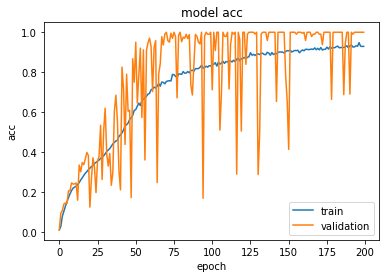

In [42]:
plot_train(history)

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0196664450673
Test accuracy: 1.0


In [44]:
# Use model.predict() to make prediction, use argmax to reverse the 'to_categorical'
print(x_test[0:4])
print(model.predict(x_test[0:4]))
print(np.argmax(model.predict(x_test[0:4]), axis=1))

# Save the model
#model.save('adding2numbers_model.h5')
#model = keras.models.load_model('adding2numbers_model.h5')

[[ 0.5         0.04      ]
 [ 0.08        0.5       ]
 [ 0.5         0.73000002]
 [ 0.34999999  0.5       ]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.51626169e-26   4.43485193e-1